In [82]:
import pandas as pd
import numpy as np

pdData = pd.concat(
    map(pd.read_csv, ["Crime_Incident_Reports_2019.csv", "Crime_Incident_Reports_2020.csv"]), ignore_index=True) 
pdData2 = pdData.drop_duplicates()

pdData3 = pdData2.dropna(subset=["INCIDENT_NUMBER", "OFFENSE_CODE", "DISTRICT", "Long", "Lat", "SHOOTING", "OCCURRED_ON_DATE"])

pdData3.to_csv("Crime_Incident_Reports_Compiled.csv")

pdData4 = pd.read_csv("Crime_Incident_Reports_Compiled.csv")

D2019 = pdData4.loc[pdData4["YEAR"] == 2019]
D2020 = pdData4.loc[pdData4["YEAR"] == 2020]


Vcount2019 = D2019["OFFENSE_DESCRIPTION"].str.contains("robbery|assault|rape", case=False).sum()
Pcount2019 = D2019["OFFENSE_DESCRIPTION"].str.contains("burglary|larceny|theft|auto theft|arson", case=False).sum()
Vcount2020 = D2020["OFFENSE_DESCRIPTION"].str.contains("robbery|assault|rape", case=False).sum()
Pcount2020 = D2020["OFFENSE_DESCRIPTION"].str.contains("burglary|larceny|theft|auto theft|arson", case=False).sum()

print("Violent Crimes 2019: ",Vcount2019, "Violent Crimes 2020: ",  Vcount2020, "Property Crimes 2019: ", Pcount2019, "Property Crimes 2020: ", Pcount2020)



/var/folders/4x/9tydsf1n3w9gn38nvgmh5p1h0000gn/T/ipykernel_46578/3836219464.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  pdData = pd.concat(
/var/folders/4x/9tydsf1n3w9gn38nvgmh5p1h0000gn/T/ipykernel_46578/3836219464.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  pdData = pd.concat(
/var/folders/4x/9tydsf1n3w9gn38nvgmh5p1h0000gn/T/ipykernel_46578/3836219464.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  pdData4 = pd.read_csv("Crime_Incident_Reports_Compiled.csv")


Violent Crimes 2019:  8324 Violent Crimes 2020:  5152 Property Crimes 2019:  13158 Property Crimes 2020:  12227


From 2019 to 2020, the number of violent crimes went down significantly. From 2019 to 2020, property crimes went down as well but not nearly as much.

Task 7.2 Create a scatterplot of annual violent crimes vs. annual property crimes by district in Boston from 2019 to 2020. X axis: annual property crimes. Y axis: annual violent crimes. Use different colors to color data from different years. 

/var/folders/4x/9tydsf1n3w9gn38nvgmh5p1h0000gn/T/ipykernel_46578/352329434.py:7: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/4x/9tydsf1n3w9gn38nvgmh5p1h0000gn/T/ipykernel_46578/352329434.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4x/9tydsf1n3w9gn38nvgmh5p1h0000gn/T/ipykernel_46578/352329434.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



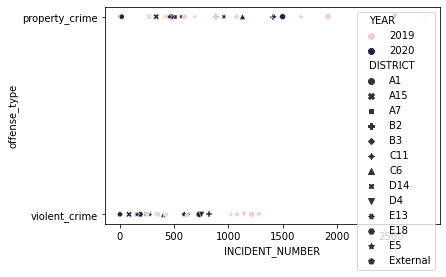

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pdData4 = pd.read_csv("Crime_Incident_Reports_Compiled.csv")

pdData4["offense_type"] = None
pdData4["offense_type"][pdData4["OFFENSE_DESCRIPTION"].str.lower().str.contains("robbery|assault|rape")] = "violent_crime"
pdData4["offense_type"][pdData4["OFFENSE_DESCRIPTION"].str.lower().str.contains("burglary|larceny|theft|arson")] = "property_crime"


describe_by_offense = pdData4.groupby(['offense_type', 'DISTRICT', 'YEAR']).agg({'INCIDENT_NUMBER': 'count'}).reset_index()

fig = sns.scatterplot(x='INCIDENT_NUMBER', y='offense_type', data=describe_by_offense, hue='YEAR', style = 'DISTRICT')
